# Ejercicio lección 1

In [28]:
import numpy as np

# Datos estatura de estudiantes
x = [1.37, 1.8, 1.65, 1.54, 1.6, 1.67, 1.7, 1.36, 1.71, 1.72,  1.8]

print("Mediana:", np.median(x))
print("Media:", round(np.mean(x), 2))
print("Desviación típica:", round(np.std(x), 2))
print("Suma:", np.sum(x))

Mediana: 1.67
Media: 1.63
Desviación típica: 0.14
Suma: 17.919999999999998


# Ejercicio lección 2

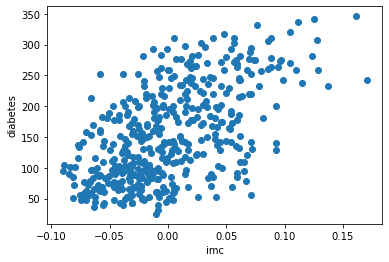

In [2]:
# Importamos el dataset, que pertenece a la biblioteca Scikit-Learn y resto de bibliotecas
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)
x=X[:,2]

# PREGUNTA 1
plt.xlabel('imc')
plt.ylabel("diabetes")
# Volcamos los datos en la gráfica con la función scatter
plt.scatter(x,y);

In [5]:
# PREGUNTA 2
media_x = round(np.mean(x), 4)
media_y = round(np.mean(y), 4)
print("El centro de gravedad es: (", media_x , "," , media_y, ")")

# PREGUNTA 3
covXY=np.cov(x,y, bias=True)[0,1]
desviacionX = np.std(x)
desviacionY = np.std(y)
# Calculamos la correlación 
r= covXY / (desviacionX * desviacionY)
# Redondeamos con 2 decimales
r = round (r, 2)
print("La correlación de las dos variables es: ",r)

# PREGUNTA 4
# Calculamos la pendiente y término independiente con la función polyfit. Pasamos como parámetros los datos. 
linear_model=np.polyfit(x,y,1)

# Establecemos el modelo de regresión lineal con los valores calculados.
linear_model_fn=np.poly1d(linear_model)
print("Ecuación de la recta:", linear_model_fn)

# PREGUNTA 5
imc = 0.002
diabetes = linear_model_fn(imc)
diabetes = round(diabetes, 4)
print("Con imc 0.002, la previsión es de", diabetes)

El centro de gravedad es: ( -0.0 , 152.1335 )
La correlación de las dos variables es:  0.59
Ecuación de la recta:  
949.4 x + 152.1
Con imc 0.002, la previsión es de 154.0324


# Ejercicio lección 3

In [21]:
import numpy as np

# PREGUNTA 1
A=np.array([[3, 4], [2, 7]])
B=np.array([2,3])
print("Matriz A: \n", A, "\n")
print("Matriz B: \n", B, "\n")
A_inv = np.linalg.inv(A)
print("Inversa de A:", A_inv)
print("Resultado final: ", B @ A_inv @ B.T)


# PREGUNTA 2
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
X, y = load_diabetes(return_X_y=True)

# Iniciamos modelo de regresión lineal
modelo = LinearRegression()
# Entrenamos el modelo con los datos de partida
modelo.fit(X,y)

# Nuestro modelo ya está creado y listo para usar

# En modelo.intercept_ tenemos el valor w0
print("w0 = ", modelo.intercept_)

#PREGUNTA 3
# En modelo.coef_ el resto de coeficientes, de w1 a w10
print("Coeficientes:", modelo.coef_)


# PREGUNTA 4
#Para predecir nuevos valores, usamos la función predict(vector)
x_nuevo = np.array([[-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872, -0.01916334, 0.07441156, -0.03949338, -0.06832974, -0.09220405]])
y_pred = modelo.predict(x_nuevo)
print("Predicción:", round(y_pred[0], 2))

Matriz A: 
 [[3 4]
 [2 7]] 

Matriz B: 
 [2 3] 

Inversa de A: [[ 0.53846154 -0.30769231]
 [-0.15384615  0.23076923]]
Resultado final:  1.4615384615384615
w0 =  152.1334841628965
Coeficientes: [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
Predicción: 68.07


# Ejercicio lección 4

In [6]:
# Importamos el dataset, que pertenece a la biblioteca Scikit-Learn
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

# PREGUNTA 1, INFORMACIÓN DEL DATASET
# Los nombres de las clases están almacenadas en target_names
print("Clases: ", dataset.target_names) 
# Los nombres de los atributos están almacenados en feature_names
print("Atributos:", dataset.feature_names) 
# Podemos mostrar una descripción completa del conjunto de datos
print("\nDescripción del dataset:")
print(dataset.DESCR)

Clases:  ['malignant' 'benign']
Atributos: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Descripción del dataset:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - textu

In [9]:
# PREGUNTA 2
# Para dividir el dataset usamos funciones predefinidas de la biblioteca Scikit-Learn
from sklearn.model_selection import train_test_split
# Almacenamos el dataset en dos variables. 
X, y = load_breast_cancer(return_X_y=True)
# Dividimos los datos en 2 conjuntos, 30% para test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# PREGUNTA 3
# Importamos el modelo GaussianNB, perteneciente al paquete naive bayes de Scikit-Learn
from sklearn.naive_bayes import GaussianNB

modeloNB = GaussianNB()

# Entrenamos el modelo pasándole los datos de entrenamiento como parámetros
modeloNB.fit(X_train, y_train)

# Para validar el modelo, vamos a predecir la clase de los datos del conjunto de test
y_pred = modeloNB.predict(X_test)

# Comparamos la clase predicha con la real y mostramos el número de errores
print("Instancias clasificadas %d, número de errores: %d"% (X_test.shape[0], (y_test != y_pred).sum()))

# PREGUNTA 4
from sklearn.metrics import confusion_matrix

#Mostramos por pantalla la matriz de confusión
#Pasamos como parámetros los valores reales del conjunto de test y la predicción del modelo
print(confusion_matrix(y_test, y_pred))

# PREGUNTA 5
print("Probabilidad(error|cancer)", 6/(57+6)*100)

(398, 30)
(398,)
(171, 30)
(171,)
Instancias clasificadas 171, número de errores: 13
[[ 57   6]
 [  7 101]]
Probabilidad(error|cancer) 9.523809523809524
